Site mic_jp in progress ...
/home/gauquier/Documents/data_icde_2025/auer/mic_jp/nb_data_resources.npy
/home/gauquier/Documents/data_icde_2025/auer/mic_jp/data_volumes.npy
here
999001
999001
[  0.      0.91    1.909 ... 383.79  383.79  383.79 ]
608256
608256
1
/home/gauquier/Documents/data_icde_2025/focused/mic_jp/nb_data_resources.npy
/home/gauquier/Documents/data_icde_2025/focused/mic_jp/data_volumes.npy
here
999001
999001
[  0.      0.943   0.985 ... 324.619 324.619 324.619]
666497
666497
1
/home/gauquier/Documents/data_icde_2025/dom_off/mic_jp/nb_data_resources.npy
/home/gauquier/Documents/data_icde_2025/dom_off/mic_jp/data_volumes.npy
here
999001
999001
[ 0.     0.11   1.034 ... 73.295 73.304 73.314]
924257
924257
1
/home/gauquier/Documents/data_icde_2025/bfs/mic_jp/nb_data_resources.npy
/home/gauquier/Documents/data_icde_2025/bfs/mic_jp/data_volumes.npy
here
999001
999001
[0.00000e+00 1.10000e-01 1.03400e+00 ... 3.28780e+02 3.28804e+02
 3.28816e+02]
662183
662183
1
/home/gauquier/

<Figure size 1200x600 with 0 Axes>

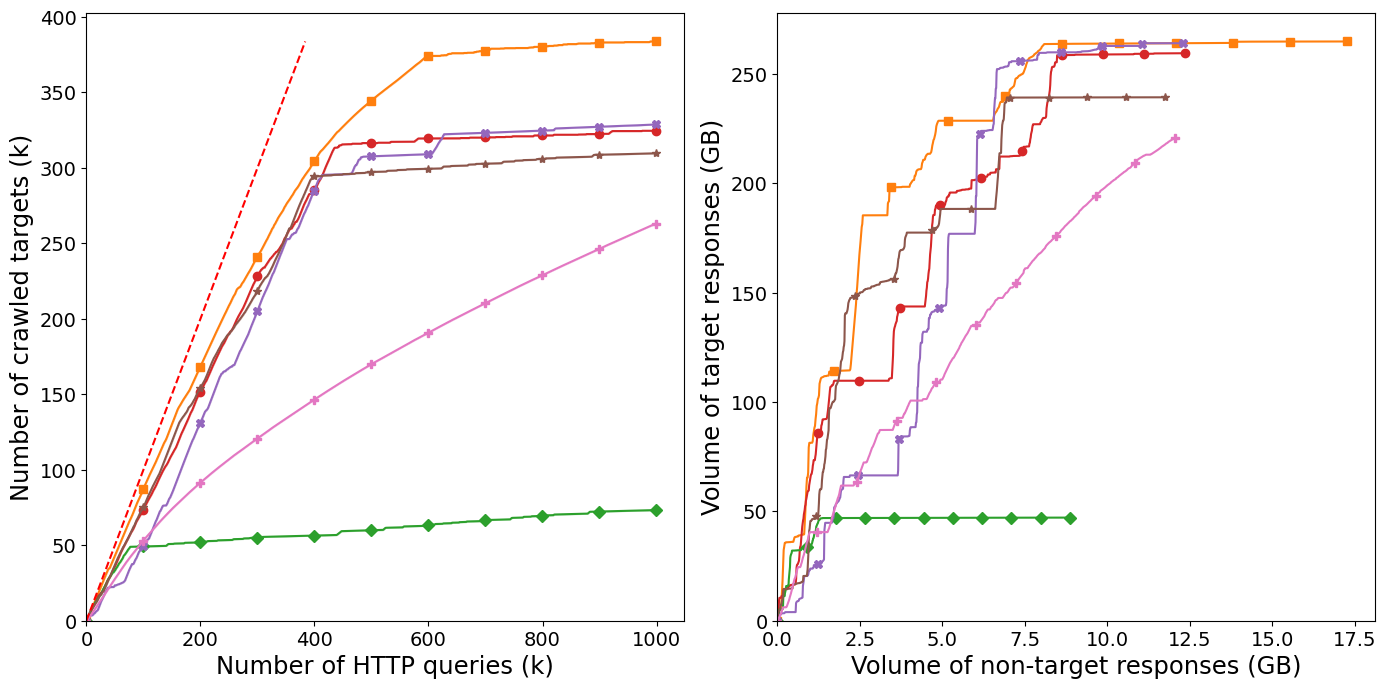

<Figure size 1200x600 with 0 Axes>

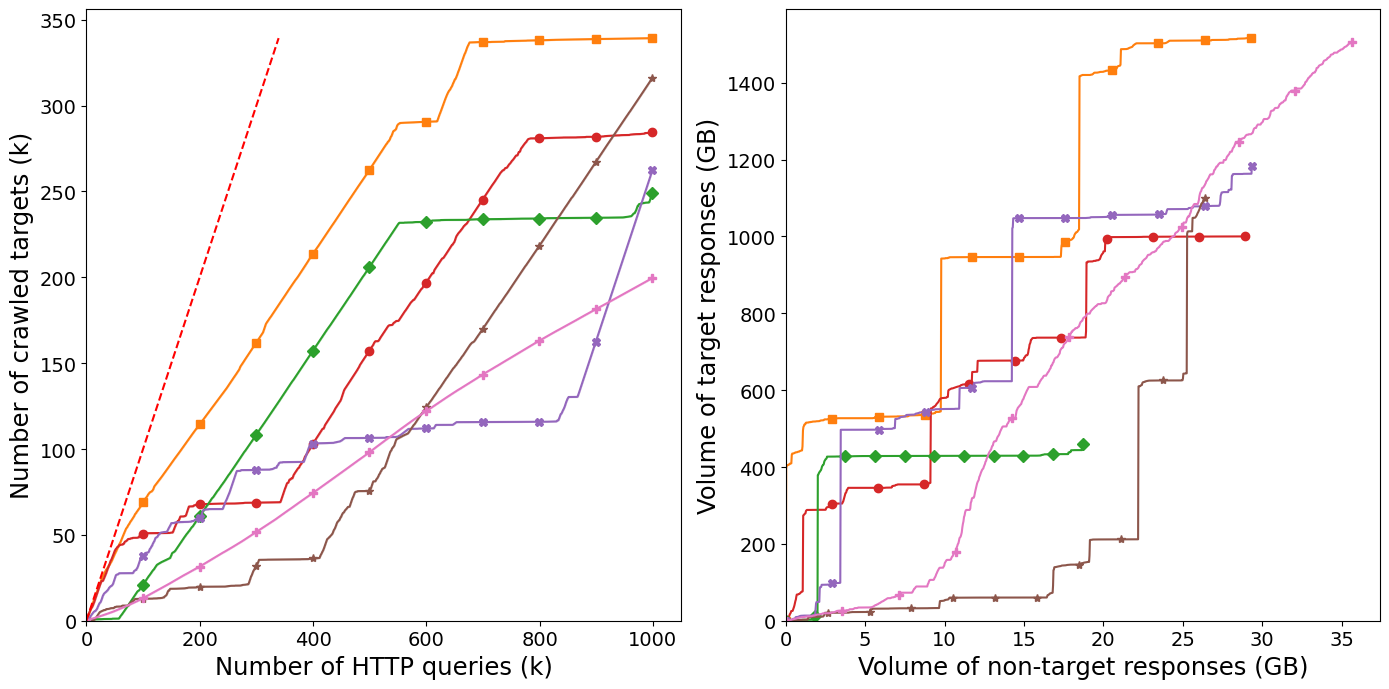

<Figure size 1200x600 with 0 Axes>

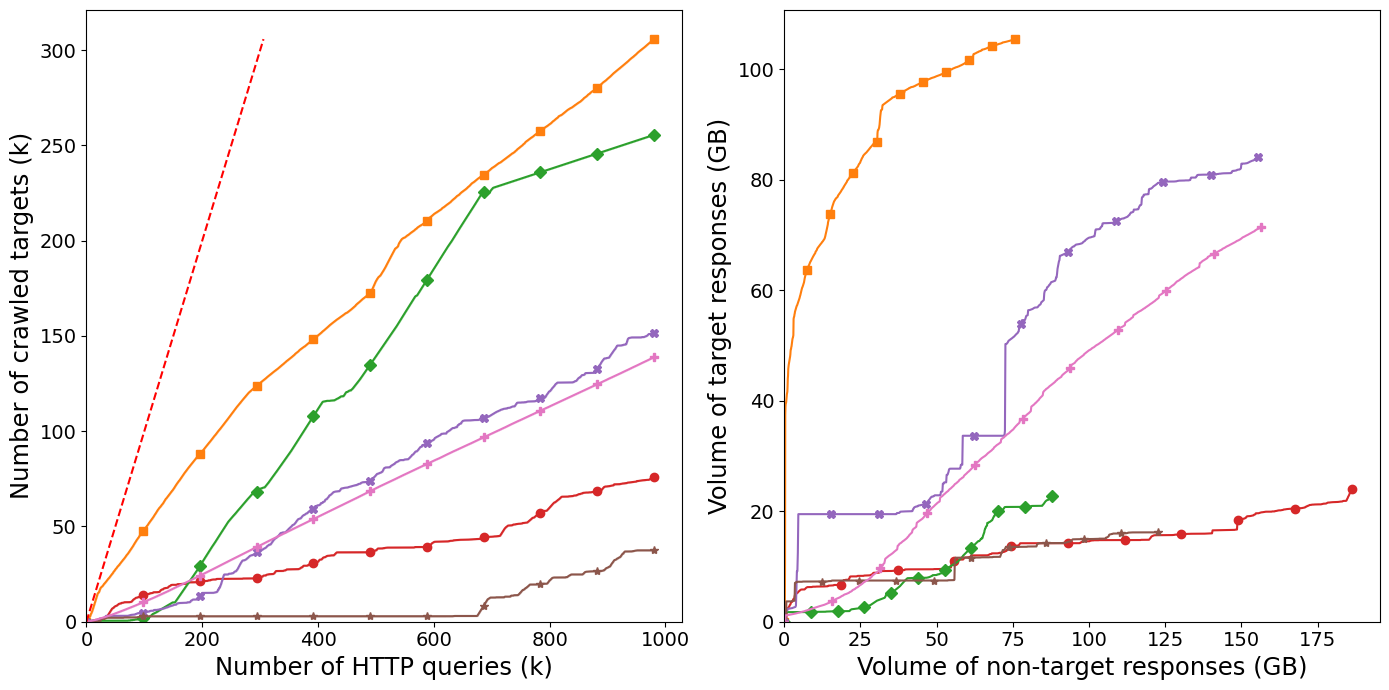

<Figure size 1200x600 with 0 Axes>

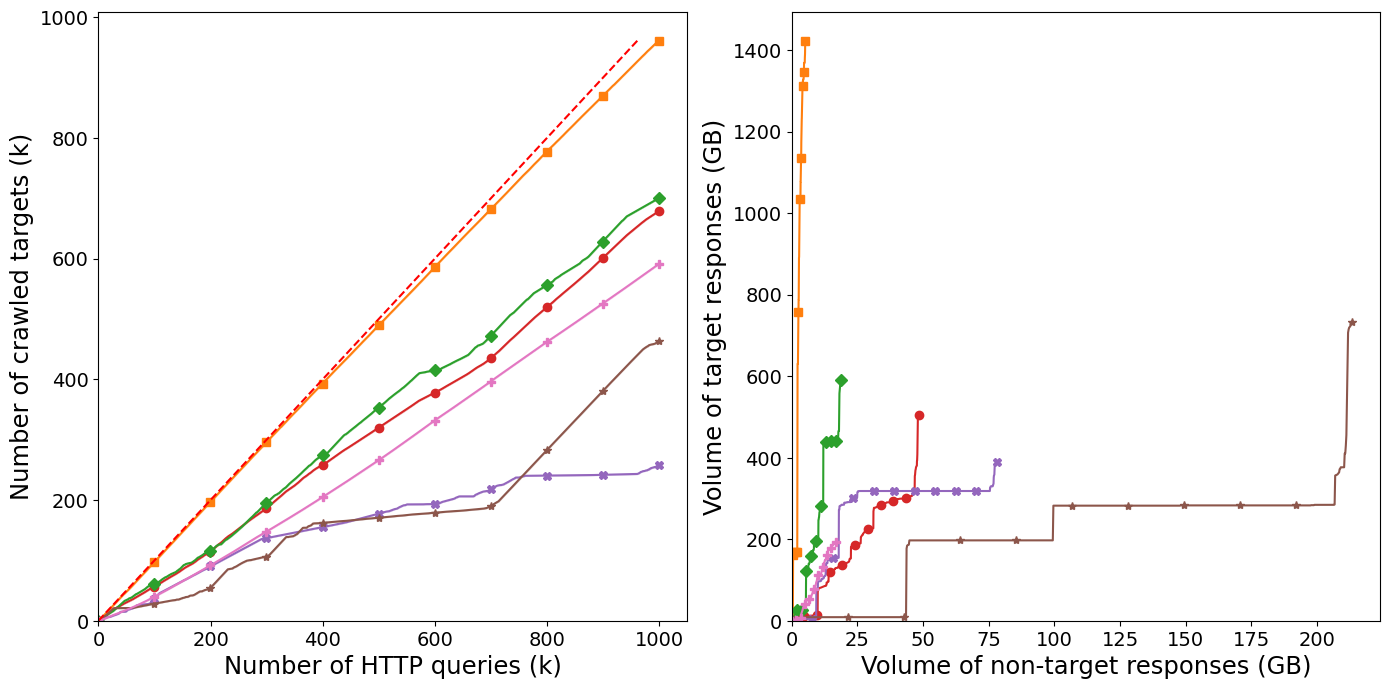

<Figure size 1200x600 with 0 Axes>

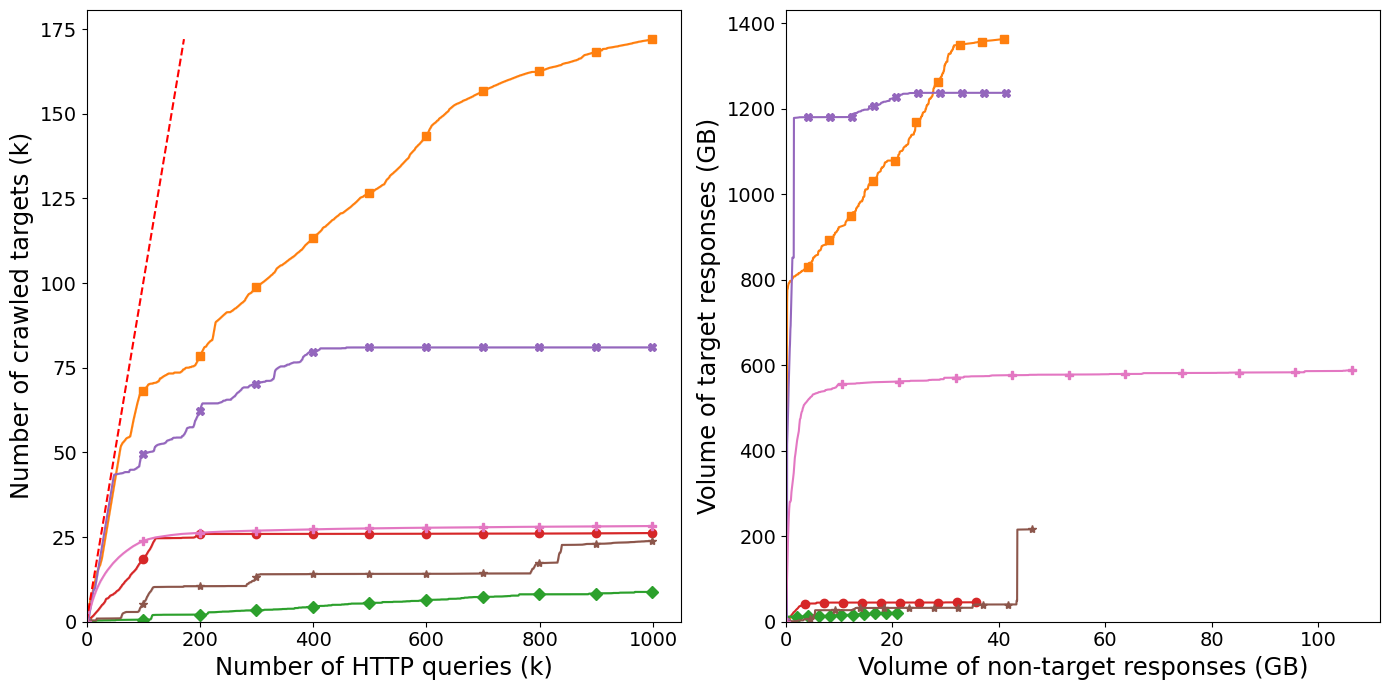

<Figure size 1200x600 with 0 Axes>

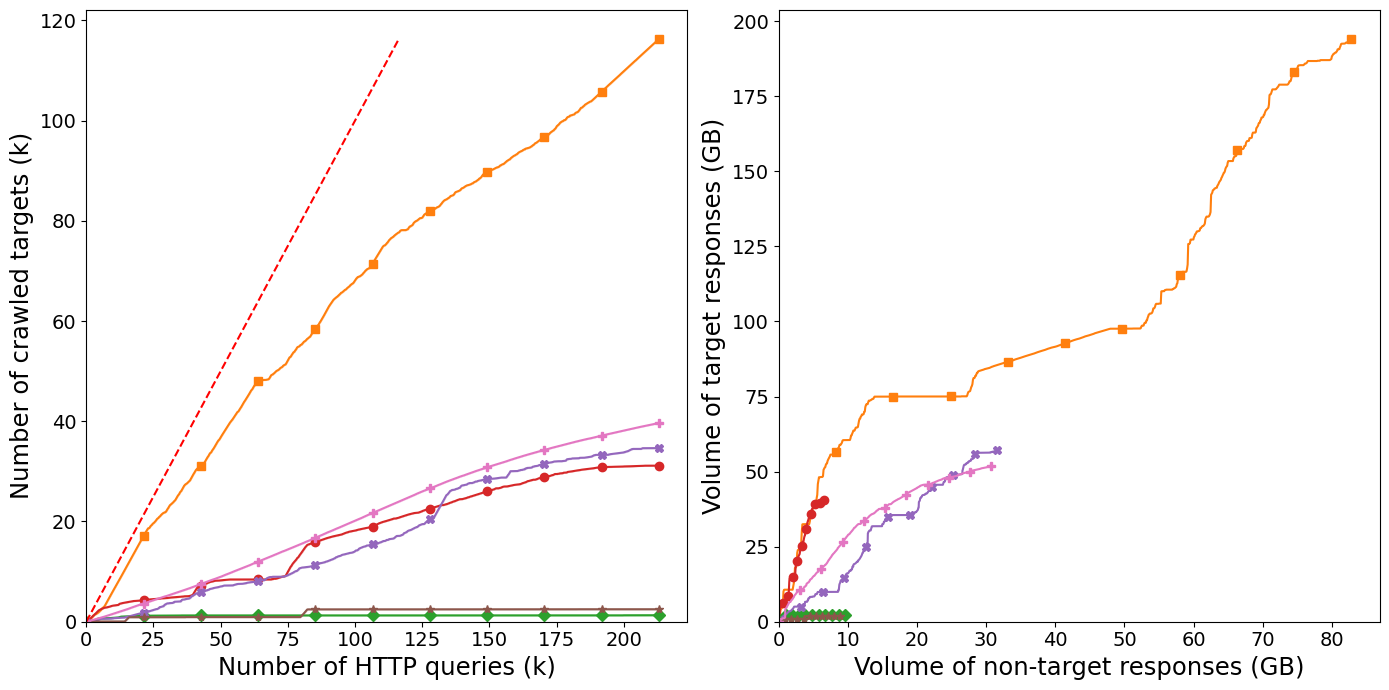

<Figure size 1200x600 with 0 Axes>

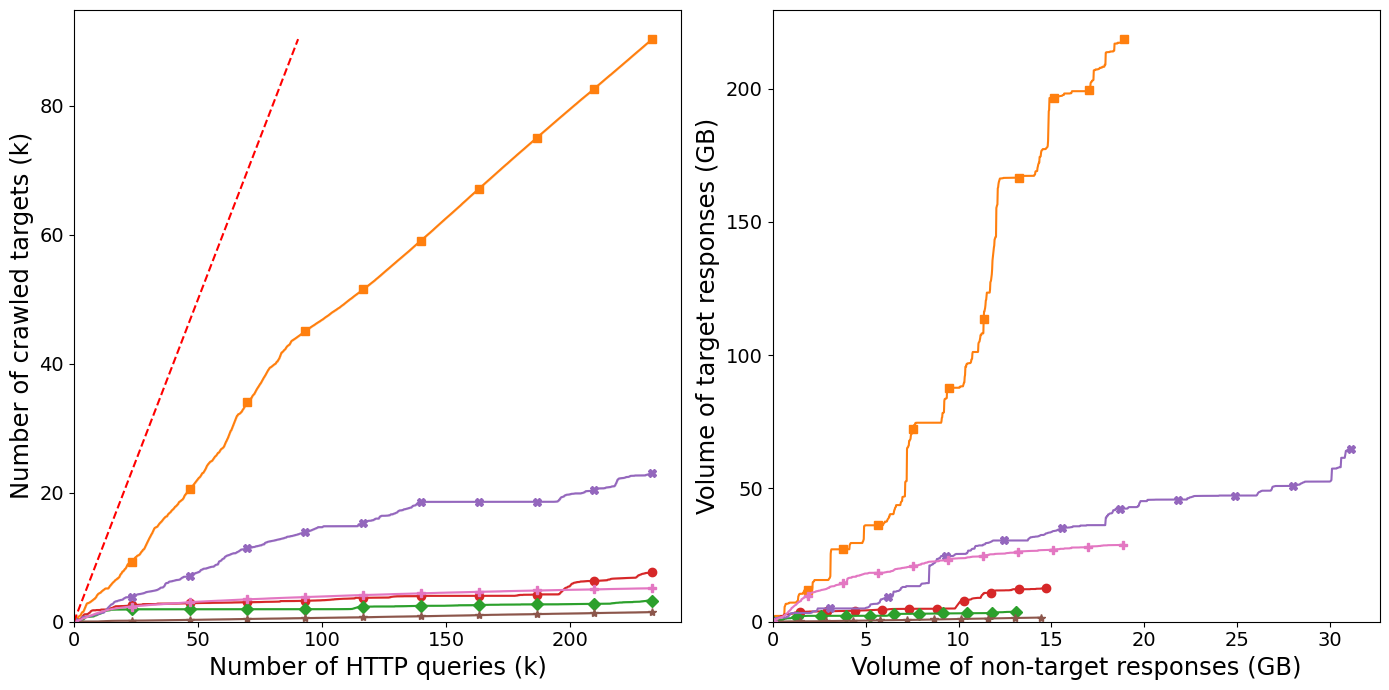

In [7]:
    import os
    import numpy as np
    import matplotlib.pyplot as plt
    from tqdm import tqdm
    from scipy.interpolate import interp1d, CubicSpline
    
    def plot_results(locations, sites, legend, colors, start_urls, markers):
        for site_idx, site_name in enumerate(sites):
    
            plt.figure(figsize=(12, 6))
            print("Site " + str(site_name) + " in progress ...")
            
            fig, axs = plt.subplots(1, 2, figsize=(14, 7))
            #axs[0].set_title(start_urls[site_idx])
            axs[0].set_xlabel('Number of HTTP queries (k)', fontsize=17.5)
            axs[0].set_ylabel('Number of crawled targets (k)', fontsize=17.5)
            
            #axs[1].set_title(start_urls[site_idx])
            axs[1].set_xlabel('Volume of non-target responses (GB)', fontsize=17.5)
            axs[1].set_ylabel('Volume of target responses (GB)', fontsize=17.5)
    
            max_resources = 0
            max_volume = 0
            
            min_length = 0
            
            max_length_volume = 0
            markevery = 0

            for method_idx, method in enumerate(locations):
                resource_data_list = []
                data_volume_list = []
                site_path = os.path.join(method, site_name)
                resource_file = os.path.join(site_path, 'nb_data_resources.npy')
                data_volume_file = os.path.join(site_path, 'data_volumes.npy')
                if os.path.exists(resource_file) and os.path.exists(data_volume_file):
                    resource_data_list.append(np.load(resource_file))
                    data_volume_list.append(np.load(data_volume_file, allow_pickle=True))
                    if min_length == 0:
                        min_length = len(resource_data_list[-1])
                    if len(resource_data_list[-1]) < min_length:
                        min_length = len(resource_data_list[-1])
                        
            for method_idx, method in enumerate(locations):
                #print("---------------------" + str(method) + "------------------------")
                resource_data_list = []
                data_volume_list = []
                marker = markers[method_idx]
                
                site_path = os.path.join(method, site_name)
                
                if not os.path.exists(site_path):
                    continue
    
                    
                resource_file = os.path.join(site_path, 'nb_data_resources.npy')
                print(resource_file)
                data_volume_file = os.path.join(site_path, 'data_volumes.npy')
                print(data_volume_file)
                

                if os.path.exists(resource_file) and os.path.exists(data_volume_file):
                    resource_data_list.append(np.load(resource_file))
                    data_volume_list.append(np.load(data_volume_file, allow_pickle=True))

                if resource_data_list:
                    resource_data_list[0] = resource_data_list[0][:min_length]
                    print("here")
                    list_x = []
                    list_y = []
                    #for resource_data in resource_data_list:
                    x = [i for i in range(0, len(resource_data_list[0]))]
                    y = list(resource_data_list[0])

                    x = [a/1e3 for a in x]
                    y = [a/1e3 for a in y]

                    print(len(x))
                    print(len(y))

                    #resource_data_list = list_y
                    max_len_site_nb =  min_length - 1
                    markevery = int(min_length/10)
                    #resource_data_list = [np.pad(data, (0, max_length - len(data)), 'edge') for data in resource_data_list]
                        
                    x_aligned = np.linspace(0, max_len_site_nb/1e3, 1001)
                    interpolated_list = []

                        
                    interp = interp1d(x, y, kind='nearest')
                    interpolated_list.append(list(interp(x_aligned)))
                    
                    resources_data = np.array(interpolated_list)
                    mean_resources = np.mean(resources_data, axis=0)
                    if mean_resources[-1] > max_resources:
                        max_resources = mean_resources[-1]
                    std_resources = np.std(resources_data, axis=0)
                    markevery_interp = int(len(x_aligned)/10)
                    print(mean_resources)
                    

                    axs[0].plot(x_aligned, mean_resources, label=legend[method_idx], color=colors[method_idx],  marker=marker, markevery=markevery_interp)
                    axs[0].fill_between(x_aligned, mean_resources - std_resources, mean_resources + std_resources, alpha=0.2, color=colors[method_idx])

                    interpolated_list = []
                    if len(data_volume_list) > 0:
                        for data_volume in data_volume_list:
                            X = []
                            Y = []
                        
                        for data_volume in data_volume_list:
                            X = []
                            Y = []
                            X_set = set()
                            for array in data_volume:
                                x, y = array
                                if x not in X_set:
                                    X_set.add(x)
                                    X.append(x/1e9)
                                    Y.append(y/1e9)

                            '''
                            if Y[-1] > max_volume:
                                max_length_volume = X[-1]
                                max_volume = Y[-1]
                            '''

                            X = X[:min_length]
                            Y = Y[:min_length]
                            print(len(X))
                            print(len(Y))
                            
                            x_aligned = np.linspace(0, X[-1], 1001)
                            interp = interp1d(X, Y, kind='nearest')
                            interpolated_list.append(list(interp(x_aligned)))
                            print(len(interpolated_list))
    
                        mean_volume = np.mean(interpolated_list, axis=0)
                        std_volume = np.std(interpolated_list, axis=0)
                        markevery_interp = int(len(x_aligned)/10)
                        
                        axs[1].plot(x_aligned, mean_volume, label=legend[method_idx], color=colors[method_idx], markevery=markevery_interp, marker=marker)
                        #axs[1].fill_between(x_aligned, mean_volume - std_volume, mean_volume + std_volume, alpha=0.2, color=colors[method_idx])             
                        
                    '''
                    else:
                        X = []
                        Y = []
                        for array in data_volume_list[0]:
                            x, y = array
                            X.append(x/1e6)
                            Y.append(y/1e6)
                    
                        axs[1].plot(X, Y, color = colors[method_idx], label=legend[method_idx], marker=marker, markevery=markevery)   
                    '''
                    #print("Method", method, "loaded")        
            axs[0].plot([0, max_resources], [0, max_resources], color = 'red', linestyle='dashed', label="OMNISCIENT")
            #axs[0].legend(fontsize=13, loc=4)
    
            #axs[1].plot([0, 0, max_length_volume], [0, max_volume, max_volume], color = 'red', linestyle='dashed', label="OMNISCIENT")
            #axs[1].legend(fontsize=13, loc=4)
    
            for ax in axs:
                ax.set_xlim(left=0)
                ax.set_ylim(bottom=0)
                ax.tick_params(axis='both', which='major', labelsize=14)
            
            plt.tight_layout()
            plt.savefig(os.path.join("/home/gauquier/Documents/", f'{site_name}_summary_sigmod.pdf'))
                    
    # Example usage
    locations = ['/home/gauquier/Documents/data_icde_2025/auer',
                 '/home/gauquier/Documents/data_icde_2025/focused',
                 '/home/gauquier/Documents/data_icde_2025/dom_off',
                 '/home/gauquier/Documents/data_icde_2025/bfs',
                 '/home/gauquier/Documents/data_icde_2025/dfs',
                 '/home/gauquier/Documents/data_icde_2025/random'
                 #'/home/gauquier/Documents/graphs_expes_icde_2025/all/auer/raw_score/logs/expes_icde_2025/tradeOff_2sqrt2_dom_2gram_seuilSimilarite_0,75_oracle',
                 #'/home/gauquier/Documents/graphs_expes_icde_2025/all/auer/raw_score/logs/expes_icde_2025/tradeOff_2sqrt2_dom_2gram_seuilSimilarite_0,75_classifieurURL',
                 #'/home/gauquier/Documents/graphs_expes_icde_2025/all/auer/raw_score/logs/expes_icde_2025/tradeOff_2sqrt2_dom_2gram_seuilSimilarite_0,75_oracle',
                 #'/home/gauquier/Documents/graphs_expes_icde_2025/all/auer/raw_score/logs/expes_icde_2025/tradeOff_30_dom_2gram_seuilSimilarite_0,75_oracle',
                 #'/home/gauquier/Documents/graphs_expes_icde_2025/all/auer/raw_score/logs/expes_icde_2025/tradeOff_30_dom_2gram_seuilSimilarite_0,75_oracle', 
                 #'/home/gauquier/Documents/for_graphs/auer/raw_score/logs/expes_icde_2025/tradeOff_2sqrt2_dom_3gram_seuilSimilarite_0,75_oracle', 
                 #'/home/gauquier/Documents/graphs_expes_icde_2025/all/focused_crawler/logs/expes_icde_2025',
                 #'/h ome/gauquier/Documents/graphs_expes_icde_2025/all/faheem/logs/expes_icde_2025', 
                 #'/home/gauquier/Documents/graphs_expes_icde_2025/all/bfs/logs/expes_icde_2025',
                 #'/home/gauquier/Documents/graphs_expes_icde_2025/all/dfs/logs/expes_icde_2025',
                 #'/home/gauquier/Documents/graphs_expes_icde_2025/all/random/logs/expes_icde_2025'
                ]
            
    start_urls = ['mic_jp', 'abs', 'assemblee_nationale', 'census', 'ilo', 'who', 'worldbank']#['https://www.oecd.org/', 'https://www.collectivites-locales.gouv.fr/', 'https://www.cnis.fr/', 'https://www.psa.gov.qa/ar/Pages/default.aspx', 'https://www.justice.gouv.fr/', 'https://www.education.gouv.fr/', 'https://www.bea.gov/', 'https://nces.ed.gov/', 'https://www.insee.fr/']# https://www.interieur.gouv.fr/', 
    legends=['SB-CLASSIFIER', 'FOCUSED', 'DOM-OFF', 'BFS', 'DFS', 'RANDOM']#['SB-CLASSIFIER', 'BFS', 'DFS', 'RANDOM', 'DOM-OFF', 'FOCUSED']#legends=['SB-ORACLE-ALPHA=0.1', 'SB-ORACLE-ALPHA=$2\sqrt{2}$', 'SB-ORACLE-ALPHA=30', 'FOCUSED', 'DOM-OFF', 'BFS', 'DFS', 'RANDOM']
    sites = ['mic_jp', 'abs', 'assemblee_nationale', 'census', 'ilo', 'who', 'worldbank']#['ilo']#['mic_jp', 'abs']#'assemblee_nationale', 'census', 'ilo', 'who', 'worldbank']#['abs']#['oecd', 'collectivites_locales', 'cnis', 'psa_qa', 'justice', 'education', 'bea', 'nces', 'insee']#, 'interieur']
    colors = ['C1', 'C3', 'C2', 'C4', 'C5', 'C6']#, 'C7']#C8 début
    markers = ['s', 'o', 'D', 'X', '*', 'P']#['^', 's', 'o', 'D', 'X', '*', 'P']#, "^"]
    
    plot_results(locations, sites, legends, colors, start_urls, markers)


In [6]:
fig, ax = plt.subplots(figsize=(8, 0.1))  
ax.axis('off') 

# x_aligned, mean_resources, label=legend[method_idx], color=colors[method_idx],  marker=marker, markevery=markevery_interp
legend_names=['SB-ORACLE-SIM=0.55', 'SB-ORACLE-SIM=0.75', 'SB-ORACLE-SIM=0.95', 'FOCUSED', 'TP-OFF', 'BFS', 'DFS', 'RANDOM']
colors = ['C8', 'C0', 'C1', 'C3', 'C2', 'C4', 'C5', 'C6']#, 'C7']#C8 début
markers = ['^', 's', 'o', 'D', 'X', '*', 'P', "^"]

handles = []

for idx in range(len(legend_names)):
    handles.append(plt.Line2D([], [], color=colors[idx], label=legend_names[idx], marker = markers[idx]))

handles.append(plt.Line2D([], [], color = 'red', linestyle='dashed', label="OMNISCIENT"))

labels = [h.get_label() for h in handles]

legend = ax.legend(
    handles, 
    labels, 
    loc="center", 
    ncol=len(labels),
    frameon=False, 
    fontsize=10  
)

plt.savefig("/home/gauquier/Documents/legend_sim.pdf", bbox_inches="tight")  
plt.close()


In [5]:
    import os
    import numpy as np
    import matplotlib.pyplot as plt
    from tqdm import tqdm
    from scipy.interpolate import interp1d, CubicSpline
    
    def plot_results(locations, sites, legend, colors, start_urls, markers):
        for site_idx, site_name in enumerate(sites):
            max_len_site_nb = 0
            max_len_site_volume = 0

            xf_yf_nb = (-1, -1)
            xf_yf_volume = (-1, -1)

            for location in locations:
                for dir_r in os.listdir(os.path.join(location, site_name)):
                    nb_resources = np.load(os.path.join(location, site_name, dir_r, "nb_resources_of_interest.npy"))
                    #print(os.path.join(location, site_name, dir_r, "nb_resources_of_interest.npy"))
                    data_volume = np.load(os.path.join(location, site_name, dir_r, "data_volume.npy"))
                    '''
                    if "tradeOff_" in os.path.join(location, site_name, dir_r, "nb_resources_of_interest.npy"):
                        print(nb_resources[-1])
                        print(data_volume[-1])
                    break
                    '''
                    if len(nb_resources) > (xf_yf_nb[0] if xf_yf_nb else 0):
                        xf_yf_nb = (len(nb_resources), xf_yf_nb[1])
                    if nb_resources[-1] > (xf_yf_nb[1] if xf_yf_nb else 0):
                        xf_yf_nb = (xf_yf_nb[0], nb_resources[-1])

                    if data_volume[-1, 0] > (xf_yf_volume[0] if xf_yf_volume else 0):
                        xf_yf_volume = (data_volume[-1, 0], xf_yf_volume[1])
                        xf_yf_volume_position = len(data_volume[:, 0])

                    if data_volume[-1, 1] > (xf_yf_volume[1] if xf_yf_volume else 0):
                        xf_yf_volume = (xf_yf_volume[0], data_volume[-1, 1])

            xf_yf_nb = (xf_yf_nb[0], 22503)
            xf_yf_volume = (xf_yf_volume[0], 24951629443)
            #print(xf_yf_nb, xf_yf_volume)
            
            for dir_r in os.listdir(os.path.join(locations[-1], site_name)):
                #max_len_site_nb = len(list(np.load(os.path.join(locations[-1], site_name, dir_r, "nb_resources_of_interest.npy"))))
                data_volume_r = np.load(os.path.join(locations[-1], site_name, dir_r, "data_volume.npy"))
    
                for array in data_volume_r:
                    x, y = array
                    if x > max_len_site_volume:
                        max_len_site_volume = x/1e9
    
            plt.figure(figsize=(12, 6))
            print("Site " + str(site_name) + " in progress ...")
            
            fig, axs = plt.subplots(1, 2, figsize=(14, 7))
            #axs[0].set_title(start_urls[site_idx])
            axs[0].set_xlabel('Number of HTTP queries (k)', fontsize=17.5)
            axs[0].set_ylabel('Number of crawled targets (k)', fontsize=17.5)
            
            #axs[1].set_title(start_urls[site_idx])
            axs[1].set_xlabel('Volume of non-target responses (GB)', fontsize=17.5)
            axs[1].set_ylabel('Volume of target responses (GB)', fontsize=17.5)
    
            max_resources = 0
            max_volume = 0
            max_length = 0
            max_length_volume = 0
            markevery = 0
            
            for method_idx, method in enumerate(locations):
                #print("---------------------" + str(method) + "------------------------")
                resource_data_list = []
                data_volume_list = []
                marker = markers[method_idx]
                
                site_path = os.path.join(method, site_name)
                
                if not os.path.exists(site_path):
                    continue
    
                for run in os.listdir(site_path):
                    run_path = os.path.join(site_path, run)
                    
                    resource_file = os.path.join(run_path, 'nb_resources_of_interest.npy')
                    data_volume_file = os.path.join(run_path, 'data_volume.npy')
                    
                    if os.path.exists(resource_file) and os.path.exists(data_volume_file):
                        resource_data_list.append(np.load(resource_file))
                        data_volume_list.append(np.load(data_volume_file, allow_pickle=True))
                
                if resource_data_list:
                    list_x = []
                    list_y = []
                    for resource_data in resource_data_list:
                        x = [i for i in range(0, len(resource_data))]
                        y = list(resource_data)
                        
                        if x[-1] < xf_yf_nb[0]:
                            for supp_idx in range(x[-1] + 1, xf_yf_nb[0]):
                                x.append(supp_idx)
                                y.append(y[-1])
                                
                        elif x[-1] > xf_yf_nb[0]:
                            max_y = y[-1]
                            x = x[:xf_yf_nb[0]]
                            y = y[:xf_yf_nb[0]]
                            y[-1] = max_y
                        
                        if y[-1] > xf_yf_nb[1]:
                            for idx in range(len(y)):
                                if y[idx] > xf_yf_nb[1]:
                                    y[idx] = xf_yf_nb[1]
                        
                        if y[-1] < xf_yf_nb[1]:
                            idx_add = x[-1] - (xf_yf_nb[1] + 1 - y[-1])+1
                            last_y = y[-1]
                            for supp_y in range(0, xf_yf_nb[1] - last_y + 1):
                                y[idx_add] += supp_y
                                idx_add += 1
                        
                        list_x.append([a/1e3 for a in x])
                        list_y.append([a/1e3 for a in y])

                    resource_data_list = list_y
                    max_length = max(len(data) for data in resource_data_list)
                    markevery = int(max_length/10)
                    resource_data_list = [np.pad(data, (0, max_length - len(data)), 'edge') for data in resource_data_list]
                    
                    max_len_site_nb = len(resource_data_list[0])
                    for idx in range (len(resource_data_list)):
                        if len(resource_data_list[idx]) > max_len_site_nb:
                            max_len_site_nb = len(resource_data_list[idx])
                        
                    x_aligned = np.linspace(0, (max_len_site_nb+1)/1e3, 1001)
                    interpolated_list = []

                    for idx in range(len(list_x)):
                        x = list_x[idx]
                        y = list_y[idx]
                        
                        x.append((max_len_site_nb+1)/1e3)
                        y.append(y[-1])
                        
                        interp = interp1d(x, y, kind='nearest')
                        interpolated_list.append(list(interp(x_aligned)))
                    
                    resources_data = np.array(interpolated_list)
                    mean_resources = np.mean(resources_data, axis=0)
                    max_resources = mean_resources[-1]
                    std_resources = np.std(resources_data, axis=0)
                    markevery_interp = int(len(x_aligned)/10)

                    
                    axs[0].plot(x_aligned, mean_resources, label=legend[method_idx], color=colors[method_idx],  marker=marker, markevery=markevery_interp)
                    axs[0].fill_between(x_aligned, mean_resources - std_resources, mean_resources + std_resources, alpha=0.2, color=colors[method_idx])

                    if len(data_volume_list) > 0:
                        max_volume = xf_yf_volume[1]/1e9
                        
                        for data_volume in data_volume_list:
                            X = []
                            Y = []
                        
                        x_aligned = np.linspace(0, max_len_site_volume, 1001)
                        interpolated_list = []
                        
                        for data_volume in data_volume_list:
                            X = []
                            Y = []
                            X_set = set()
                            for array in data_volume:
                                x, y = array
                                if x not in X_set:
                                    X_set.add(x)
                                    X.append(x/1e9)
                                    Y.append(y/1e9)
                            
                            if X[-1] < xf_yf_volume[0]/1e9:
                                X.append(xf_yf_volume[0]/1e9)
                                Y.append(Y[-1])
                                
                            elif X[-1] > xf_yf_volume[0]/1e9:
                                for idx in range(1, len(X)):
                                    if X[idx] > xf_yf_volume[0]/1e9:
                                        max_y = Y[-1]
                                        X = X[:idx]
                                        Y = Y[:idx]
                                        X.append(xf_yf_volume[0]/1e9)
                                        Y.append(max_y)
                                        break
        
                            if Y[-1] > xf_yf_volume[1]/1e9:
                                for idx in range(len(Y)):
                                    if Y[idx] > xf_yf_volume[1]/1e9:
                                        Y[idx] = xf_yf_volume[1]/1e9
        
                            elif Y[-1] < xf_yf_volume[1]/1e9:
                                Y[-1] += (xf_yf_volume[1]/1e9 - Y[-1])

                            X.append(max_len_site_volume + 1)
                            Y.append(Y[-1])

                            interp = interp1d(X, Y, kind='nearest')
                            interpolated_list.append(list(interp(x_aligned)))
    
                        mean_volume = np.mean(interpolated_list, axis=0)
                        std_volume = np.std(interpolated_list, axis=0)
                        markevery_interp = int(len(x_aligned)/10)
                        axs[1].plot(x_aligned, mean_volume, label=legend[method_idx], color=colors[method_idx], markevery=markevery_interp, marker=marker)
                        axs[1].fill_between(x_aligned, mean_volume - std_volume, mean_volume + std_volume, alpha=0.2, color=colors[method_idx])             

                    '''
                    else:
                        X = []
                        Y = []
                        for array in data_volume_list[0]:
                            x, y = array
                            X.append(x/1e6)
                            Y.append(y/1e6)
                    
                        axs[1].plot(X, Y, color = colors[method_idx], label=legend[method_idx], marker=marker, markevery=markevery)   
                    '''
                    #print("Method", method, "loaded")        
            axs[0].plot([0, max_resources, max_len_site_nb/1e3], [0, max_resources, max_resources], color = 'red', linestyle='dashed', label="OMNISCIENT")
            #axs[0].legend(fontsize=13, loc=4)
    
            axs[1].plot([0, 0, max_len_site_volume], [0, max_volume, max_volume], color = 'red', linestyle='dashed', label="OMNISCIENT")
            #axs[1].legend(fontsize=13, loc=4)
    
            for ax in axs:
                ax.set_xlim(left=0)
                ax.set_ylim(bottom=0)
                ax.tick_params(axis='both', which='major', labelsize=14)
            
            plt.tight_layout()
            plt.savefig(os.path.join("/home/gauquier/Documents/graphs_expes_icde_2025/results/sb", f'{site_name}_summary.pdf'))
                    

    
    # Example usage
    locations = [
                 '/home/gauquier/Documents/graphs_expes_icde_2025/all/auer/raw_score/logs/expes_icde_2025/tradeOff_2sqrt2_dom_2gram_seuilSimilarite_0,75_oracle',
                 '/home/gauquier/Documents/graphs_expes_icde_2025/all/auer/raw_score/logs/expes_icde_2025/tradeOff_2sqrt2_dom_2gram_seuilSimilarite_0,75_classifieurURL',
                 #'/home/gauquier/Documents/graphs_expes_icde_2025/all/auer/raw_score/logs/expes_icde_2025/tradeOff_2sqrt2_dom_2gram_seuilSimilarite_0,75_oracle',
                 #'/home/gauquier/Documents/graphs_expes_icde_2025/all/auer/raw_score/logs/expes_icde_2025/tradeOff_30_dom_2gram_seuilSimilarite_0,75_oracle',
                 #'/home/gauquier/Documents/graphs_expes_icde_2025/all/auer/raw_score/logs/expes_icde_2025/tradeOff_30_dom_2gram_seuilSimilarite_0,75_oracle', 
                 #'/home/gauquier/Documents/for_graphs/auer/raw_score/logs/expes_icde_2025/tradeOff_2sqrt2_dom_3gram_seuilSimilarite_0,75_oracle', 
                 '/home/gauquier/Documents/graphs_expes_icde_2025/all/focused_crawler/logs/expes_icde_2025',
                 '/home/gauquier/Documents/graphs_expes_icde_2025/all/faheem/logs/expes_icde_2025', 
                 '/home/gauquier/Documents/graphs_expes_icde_2025/all/bfs/logs/expes_icde_2025',
                 '/home/gauquier/Documents/graphs_expes_icde_2025/all/dfs/logs/expes_icde_2025',
                 '/home/gauquier/Documents/graphs_expes_icde_2025/all/random/logs/expes_icde_2025']
            
    start_urls = ['interieur']#['oecd', 'collectivites_locales', 'cnis', 'psa_qa', 'justice', 'education', 'bea', 'nces', 'insee', 'okfn']#['interieur']#['https://www.oecd.org/', 'https://www.collectivites-locales.gouv.fr/', 'https://www.cnis.fr/', 'https://www.psa.gov.qa/ar/Pages/default.aspx', 'https://www.justice.gouv.fr/', 'https://www.education.gouv.fr/', 'https://www.bea.gov/', 'https://nces.ed.gov/', 'https://www.insee.fr/']# https://www.interieur.gouv.fr/', 
    legends=legends=['SB-ORACLE', 'SB-CLASSIFIER', 'FOCUSED', 'DOM-OFF', 'BFS', 'DFS', 'RANDOM']
    sites = ['interieur']#['oecd', 'collectivites_locales', 'cnis', 'psa_qa', 'justice', 'education', 'bea', 'nces', 'insee', 'okfn']#['interieur']#['oecd', 'collectivites_locales', 'cnis', 'psa_qa', 'justice', 'education', 'bea', 'nces', 'insee']#, 'interieur']
    colors = ['C0', 'C1', 'C3', 'C2', 'C4', 'C5', 'C6']#, 'C7']#C8 début
    markers = ['^', 's', 'o', 'D', 'X', '*', 'P']#, "^"]
    
    plot_results(locations, sites, legends, colors, start_urls, markers)


NotADirectoryError: [Errno 20] Not a directory: '/home/gauquier/Documents/data_icde_2025/auer/mic_jp/data_volumes.npy/nb_resources_of_interest.npy'

In [22]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from scipy.interpolate import interp1d, CubicSpline

def plot_results(locations, sites, legend, colors, start_urls, markers):
    for site_idx, site_name in enumerate(sites):
        max_len_site_nb = 0
        max_len_site_volume = 0
        max_y_f_resources = 0
        max_y_f_volume = 0

        for dir_r in os.listdir(os.path.join(locations[-1], site_name)):
            nb_resources = np.load(os.path.join(locations[-1], site_name, dir_r, "nb_resources_of_interest.npy"))
            max_len_site_nb = max(max_len_site_nb, len(nb_resources))
            
            data_volume_r = np.load(os.path.join(locations[-1], site_name, dir_r, "data_volume.npy"))
            max_len_site_volume = max(max_len_site_volume, max(data_volume_r[:, 0]) / 1e6)

            # Track the maximum y_f values across all methods for alignment
            max_y_f_resources = max(max_y_f_resources, nb_resources[-1])
            max_y_f_volume = max(max_y_f_volume, max(data_volume_r[:, 1] / 1e6))

        plt.figure(figsize=(12, 6))
        print("Site " + str(site_name) + " in progress ...")

        fig, axs = plt.subplots(1, 2, figsize=(14, 7))
        axs[0].set_xlabel('Number of HTTP queries', fontsize=17.5)
        axs[0].set_ylabel('Number of crawled targets', fontsize=17.5)
        axs[1].set_xlabel('Volume of non-target responses (MB)', fontsize=17.5)
        axs[1].set_ylabel('Volume of target responses (MB)', fontsize=17.5)

        for method_idx, method in enumerate(locations):
            resource_data_list = []
            data_volume_list = []
            marker = markers[method_idx]

            site_path = os.path.join(method, site_name)
            if not os.path.exists(site_path):
                continue

            for run in os.listdir(site_path):
                run_path = os.path.join(site_path, run)
                resource_file = os.path.join(run_path, 'nb_resources_of_interest.npy')
                data_volume_file = os.path.join(run_path, 'data_volume.npy')

                if os.path.exists(resource_file) and os.path.exists(data_volume_file):
                    resource_data_list.append(np.load(resource_file))
                    data_volume_list.append(np.load(data_volume_file, allow_pickle=True))

            if resource_data_list:
                max_length = max(len(data) for data in resource_data_list)
                resource_data_list = [np.pad(data, (0, max_length - len(data)), 'edge') for data in resource_data_list]

                x_aligned = np.linspace(0, max_len_site_nb, 1005)
                interpolated_list = []
                for resource_data in resource_data_list:
                    X = list(range(len(resource_data)))
                    Y = list(resource_data)
                    X.append(max_len_site_nb + 1)
                    Y.append(Y[-1])
                    interp = interp1d(X, Y, kind='nearest')
                    interpolated_list.append(list(interp(x_aligned)))

                resources_data = np.array(interpolated_list)
                mean_resources = np.mean(resources_data, axis=0)
                mean_resources[mean_resources > max_y_f_resources] = max_y_f_resources
                mean_resources = mean_resources[:np.searchsorted(x_aligned, max_len_site_nb)]
                
                axs[0].plot(x_aligned[:len(mean_resources)], mean_resources, label=legend[method_idx], 
                            color=colors[method_idx], marker=marker, markevery=int(len(x_aligned) / 10))
                axs[0].fill_between(x_aligned[:len(mean_resources)], 
                                    mean_resources - np.std(resources_data, axis=0)[:len(mean_resources)], 
                                    mean_resources + np.std(resources_data, axis=0)[:len(mean_resources)], 
                                    alpha=0.2, color=colors[method_idx])

            if data_volume_list:
                interpolated_volumes = []
                for data_volume in data_volume_list:
                    x_vals = data_volume[:, 0] / 1e6
                    y_vals = data_volume[:, 1] / 1e6
                    x_vals = np.append(x_vals, max_len_site_volume + 1)
                    y_vals = np.append(y_vals, y_vals[-1])
                    interp = interp1d(x_vals, y_vals, kind='nearest', bounds_error=False, fill_value="extrapolate")
                    y_interpolated = interp(x_aligned)
                    y_interpolated[y_interpolated > max_y_f_volume] = max_y_f_volume
                    interpolated_volumes.append(y_interpolated)

                mean_volume = np.mean(interpolated_volumes, axis=0)
                axs[1].plot(x_aligned, mean_volume, label=legend[method_idx], color=colors[method_idx],
                            marker=marker, markevery=int(len(x_aligned) / 10))
                axs[1].fill_between(x_aligned, mean_volume - np.std(interpolated_volumes, axis=0),
                                    mean_volume + np.std(interpolated_volumes, axis=0), alpha=0.2, color=colors[method_idx])

        axs[0].plot([0, max_len_site_nb], [0, max_y_f_resources], color='red', linestyle='dashed', label="OMNISCIENT")
        axs[1].plot([0, max_len_site_volume], [0, max_y_f_volume], color='red', linestyle='dashed', label="OMNISCIENT")

        axs[0].legend(fontsize=13, loc=4)
        axs[1].legend(fontsize=13, loc=4)

        for ax in axs:
            ax.set_xlim(left=0)
            ax.set_ylim(bottom=0)
            ax.tick_params(axis='both', which='major', labelsize=14)

        plt.tight_layout()
        plt.savefig(os.path.join("/home/gauquier/Documents/graphs_expes_icde_2025/results/sb", f'{site_name}_summary.pdf'))
        plt.close()

    # Example usage
locations = ['/home/gauquier/Documents/graphs_expes_icde_2025/all/auer/raw_score/logs/expes_icde_2025/tradeOff_2sqrt2_dom_2gram_seuilSimilarite_0,75_oracle',
                 '/home/gauquier/Documents/graphs_expes_icde_2025/all/auer/raw_score/logs/expes_icde_2025/tradeOff_2sqrt2_dom_2gram_seuilSimilarite_0,75_classifieurURL',
                 #'/home/gauquier/Documents/graphs_expes_icde_2025/all/auer/raw_score/logs/expes_icde_2025/tradeOff_2sqrt2_dom_2gram_seuilSimilarite_0,75_oracle',
                 #'/home/gauquier/Documents/graphs_expes_icde_2025/all/auer/raw_score/logs/expes_icde_2025/tradeOff_30_dom_2gram_seuilSimilarite_0,75_oracle',
                 #'/home/gauquier/Documents/graphs_expes_icde_2025/all/auer/raw_score/logs/expes_icde_2025/tradeOff_30_dom_2gram_seuilSimilarite_0,75_oracle', 
                 #'/home/gauquier/Documents/for_graphs/auer/raw_score/logs/expes_icde_2025/tradeOff_2sqrt2_dom_3gram_seuilSimilarite_0,75_oracle', 
                 '/home/gauquier/Documents/graphs_expes_icde_2025/all/focused_crawler/logs/expes_icde_2025',
                 '/home/gauquier/Documents/graphs_expes_icde_2025/all/faheem/logs/expes_icde_2025', 
                 '/home/gauquier/Documents/graphs_expes_icde_2025/all/bfs/logs/expes_icde_2025',
                 '/home/gauquier/Documents/graphs_expes_icde_2025/all/dfs/logs/expes_icde_2025',
                 '/home/gauquier/Documents/graphs_expes_icde_2025/all/random/logs/expes_icde_2025']
            
start_urls = ['https://www.collectivites-locales.gouv.fr/', 'https://www.cnis.fr/', 'https://www.psa.gov.qa/ar/Pages/default.aspx', 'https://www.justice.gouv.fr/', 'https://www.education.gouv.fr/', 'https://www.bea.gov/', 'https://nces.ed.gov/', 'https://www.insee.fr/']
legends=['SB-ORACLE', 'SB-CLASSIFIER', 'FOCUSED', 'DOM-OFF', 'BFS', 'DFS', 'RANDOM']#legends=['SB-ORACLE-ALPHA=0.1', 'SB-ORACLE-ALPHA=$2\sqrt{2}$', 'SB-ORACLE-ALPHA=30', 'FOCUSED', 'DOM-OFF', 'BFS', 'DFS', 'RANDOM']
sites = ['collectivites_locales', 'cnis', 'psa_qa', 'justice', 'education', 'bea', 'nces', 'insee']
colors = ['C0', 'C1', 'C3', 'C2', 'C4', 'C5', 'C6']#, 'C7']#C8 début
markers = ['^', 's', 'o', 'D', 'X', '*', 'P']#, "^"]
    
plot_results(locations, sites, legends, colors, start_urls, markers)

Site collectivites_locales in progress ...
Site cnis in progress ...
Site psa_qa in progress ...
Site justice in progress ...
Site education in progress ...
Site bea in progress ...
Site nces in progress ...
Site insee in progress ...


<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

[258.9085365853659, 14.337545893719808, 18.616666666666667, 676.0, 11.882418679840441, 65.63333333333333, 26.133333333333333, 1062.0, 286.0, 159.0]
[166.85714285714286, 9.86149618709561, 13.728096757044126, 320.0, 5.927450980392155, 26.979365079365078, 11.666666666666666, 50.5, 177.0, 109.0]
[85.28571428571429, 7.634129151525149, 11.543650793650794, 295.0, 3.851675266597867, 16.096825396825395, 11.011111111111113, 50.5, 165.0, 101.5]
[52.9, 6.105415324580572, 9.075396825396826, 292.0, 2.768326381570505, 13.043634462643498, 6.8, 47.94117647058823, 145.0, 95.25]
[37.375, 5.553727335833693, 7.401937441643324, 292.0, 2.078695349484823, 6.695033561210033, 6.733333333333333, 38.0, 87.33333333333333, 67.2]
[29.25, 4.4198754124095165, 6.319054269979155, 290.0, 1.7414379741186967, 3.5880854489215595, 5.213333333333334, 33.254098360655746, 82.5, 59.83333333333333]
[28.696796016160782, 3.712844012195838, 5.4008821623312775, 284.5, 1.4385771939484633, 2.8082269934836956, 4.333333333333333, 30.2333

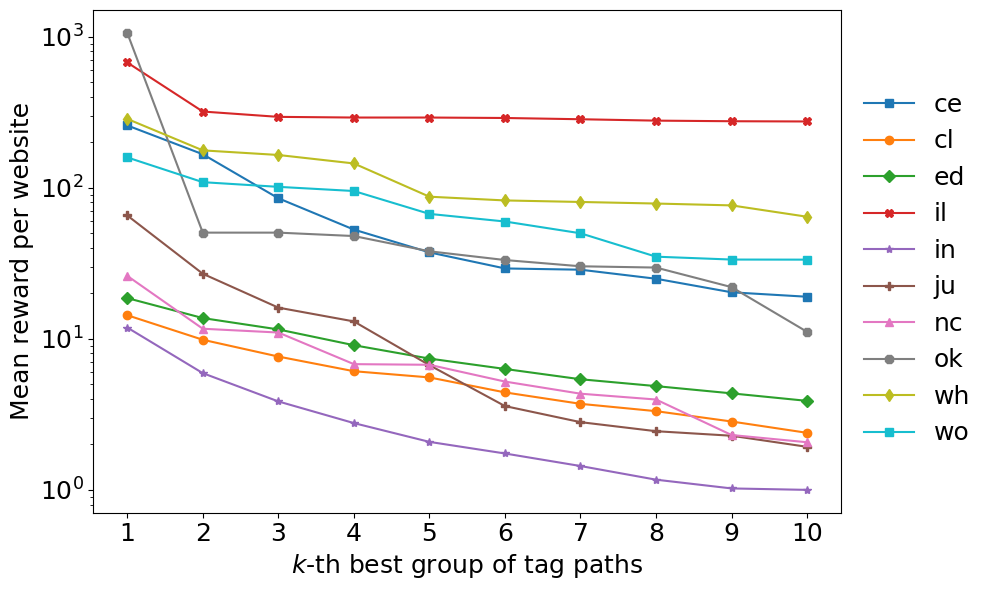

In [3]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.ticker import AutoMinorLocator, MultipleLocator


def read_data(file_path):
    site_data = {}
    with open(file_path, 'r') as file:
        for line in file:
            site_name, values = line.strip().split(' [')
            values = values.rstrip(']').split(', ')
            values = list(map(float, values))
            site_data[site_name] = values
    return site_data

def plot_histogram(site_data, threshold, markers):
    num_top_values = 10

    means = []
    for k in range(num_top_values):
        values = [site_data[site][k] for site in site_data]
        print(values)
        means.append(np.mean(values))
    print("\n-------------")
    print(means)

    
    fig, ax1 = plt.subplots(figsize=(10, 6))
    #ax1.bar(range(1, num_top_values + 1), means, color='lightgrey', edgecolor="black", alpha=.8,linewidth=1.5)
    
    for i, site in enumerate(site_data):
        top_values = [min(value, threshold) for value in site_data[site]]
        ax1.plot(range(1, num_top_values + 1), top_values, marker=markers[i % len(markers)], linestyle='-', label=site)

    ax1.set_xlabel('$k$-th best group of tag paths', fontsize=18)
    ax1.set_ylabel('Mean reward per website', fontsize=18)
    ax1.legend(loc='upper left', frameon=False, fontsize=18, bbox_to_anchor=(1, 0.88))
    ax1.xaxis.set_major_locator(MultipleLocator(1))
    ax1.tick_params(axis='both', which='major', labelsize=18)

    ax1.set_yscale('log')
    
    ax1.set_zorder(ax1.get_zorder()-1)
    ax1.patch.set_visible(False)
    
    plt.tight_layout()
    plt.savefig("/home/gauquier/Documents/data_icde_2025/reward_distribution/top_k_dom_groups.pdf")
    plt.show()

markers = ['s', 'o', 'D', 'X', '*', 'P', "^", "8", 'd']
file_path = '/home/gauquier/Documents/data_icde_2025/reward_distribution/np_top_10.txt'
site_data = read_data(file_path)
plot_histogram(site_data, threshold=1000000, markers=markers)


In [13]:
import os 
import numpy as np
from tqdm import tqdm

def get_values(locations, site_names, threshold):
    res = {}
    for location_idx, location in enumerate(locations):
        res[location] = {}
        for site_idx, site in tqdm(enumerate(site_names)):
            res[location][site] = {}
            queries = []
            volumes = []
            for dir_run in os.listdir(os.path.join(location, site)):
                queries_data = list(np.load(os.path.join(location, site, dir_run, "nb_resources_of_interest.npy")))
                queries.append(100*np.searchsorted(queries_data, int(threshold*queries_data[-1]), side='right') / len(queries_data))
                
                volume_data = list(np.load(os.path.join(location, site, dir_run, "data_volume.npy"), allow_pickle = True))
                volume_data_y = [arr[1] for arr in volume_data]
                volume_data_x = [arr[0] for arr in volume_data]
                idx_y_above_threshold = np.searchsorted(volume_data_y, int(threshold*volume_data_y[-1]), side='right')
                volumes.append(100*volume_data_x[idx_y_above_threshold] / volume_data_x[-1])
            res[location][site]['queries'] = round(np.mean(queries), 1)
            res[location][site]['volumes'] = round(np.mean(volumes), 1)
    return res

locations = ['/home/gauquier/Documents/for_graphs/auer/raw_score/logs/expes_vldb_2025/tradeOff_2sqrt2_dom_2gram_seuilSimilarite_0,55_oracle', '/home/gauquier/Documents/for_graphs/auer/raw_score/logs/expes_vldb_2025/tradeOff_2sqrt2_dom_2gram_seuilSimilarite_0,75_oracle','/home/gauquier/Documents/for_graphs/auer/raw_score/logs/expes_vldb_2025/tradeOff_2sqrt2_dom_2gram_seuilSimilarite_0,95_oracle']
site_names = ['collectivites_locales', 'cnis', 'assemblee_nationale', 'interieur', 'ilo', 'mic_jp', 'psa_qa', 'justice', 'education']
dict_values_t_90 = get_values(locations, site_names, 0.9)

9it [00:17,  1.98s/it]
9it [00:17,  1.91s/it]
8it [00:16,  1.83s/it]/home/gauquier/anaconda3/lib/python3.12/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/gauquier/anaconda3/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
9it [00:16,  1.86s/it]


In [14]:
def return_latex_table_ablation_studies(dict_values):
    res = ""
    res += "\\begin{table*}\n"
    res += "\t\\centering\n"
    res += "\t\\caption{BlaBlaBla}\n"
    res += "\t\\begin{tabular}{cccccccccc}\n"
    res += "\t\t\\toprule\n"
    res += "\t\t\t\\bfseries Method & \\emph{cl} & \\emph{cn} & \\emph{as} & \\emph{in} & \\emph{il} & \\emph{jp} & \\emph{qa} & \\emph{ju} & \\emph{ed} \\\\ \n"
    res += "\t\t\\midrule\n"
    for location in dict_values:
        line_location = "\t\t\t\\bfseries Method " + str(location)  + " "
        for site in dict_values[location]:
            line_location += "& " + str(dict_values[location][site]['queries']) + " | " + str(dict_values[location][site]['volumes']) + " "
        line_location += "\\\\"
        res += line_location + "\n"
    res += "\t\t\\bottomrule\n"
    res += "\t\\end{tabular}\n"
    res += "\t\\label{tab:BlaBlaBla}\n"
    res += "\\end{table*}\n"
    print(res)

return_latex_table_ablation_studies(dict_values_t_90)

\begin{table*}
	\centering
	\caption{BlaBlaBla}
	\begin{tabular}{cccccccccc}
		\toprule
			\bfseries Method & \emph{cl} & \emph{cn} & \emph{as} & \emph{in} & \emph{il} & \emph{jp} & \emph{qa} & \emph{ju} & \emph{ed} \\ 
		\midrule
			\bfseries Method /home/gauquier/Documents/for_graphs/auer/raw_score/logs/expes_vldb_2025/tradeOff_2sqrt2_dom_2gram_seuilSimilarite_0,55_oracle & 76.8 | 50.5 & 76.6 | 41.9 & 26.6 | 7.7 & 8.2 | 9.4 & 9.0 | 7.1 & 30.1 | 21.7 & 67.8 | 25.9 & 80.6 | 65.4 & 56.5 | 53.1 \\
			\bfseries Method /home/gauquier/Documents/for_graphs/auer/raw_score/logs/expes_vldb_2025/tradeOff_2sqrt2_dom_2gram_seuilSimilarite_0,75_oracle & 76.4 | 56.3 & 71.8 | 24.5 & 24.2 | 6.7 & 11.1 | 11.0 & 9.3 | 7.2 & 30.2 | 24.7 & 68.9 | 33.9 & 35.0 | 22.9 & 53.0 | 49.2 \\
			\bfseries Method /home/gauquier/Documents/for_graphs/auer/raw_score/logs/expes_vldb_2025/tradeOff_2sqrt2_dom_2gram_seuilSimilarite_0,95_oracle & 84.4 | 72.1 & 73.1 | 44.7 & 24.2 | 9.4 & 9.8 | 11.0 & 9.4 | 7.1 & 30.4 | 28.6 &

In [44]:
import os 
import numpy as np
from tqdm import tqdm

def get_values(locations, site_names, threshold):
    res = {}
    for location_idx, location in enumerate(locations):
        res[location] = {}
        for site_idx, site in tqdm(enumerate(site_names)):
            res[location][site] = {}
            queries = []
            volumes = []
            for dir_run in os.listdir(os.path.join(location, site)):
                queries_data = list(np.load(os.path.join(location, site, dir_run, "nb_resources_of_interest.npy")))
                queries.append(100*np.searchsorted(queries_data, int(threshold*queries_data[-1]), side='right') / len(queries_data))
                
                volume_data = list(np.load(os.path.join(location, site, dir_run, "data_volume.npy"), allow_pickle = True))
                volume_data_y = [arr[1] for arr in volume_data]
                volume_data_x = [arr[0] for arr in volume_data]
                idx_y_above_threshold = np.searchsorted(volume_data_y, int(threshold*volume_data_y[-1]), side='right')
                volumes.append(100*volume_data_x[idx_y_above_threshold] / volume_data_x[-1])
            res[location][site]['queries'] = round(np.mean(queries), 1)
            res[location][site]['volumes'] = round(np.mean(volumes), 1)
    return res

locations = ['/home/gauquier/Documents/for_graphs/auer/raw_score/logs/expes_vldb_2025/tradeOff_2sqrt2_dom_2gram_seuilSimilarite_0,55_oracle', '/home/gauquier/Documents/for_graphs/auer/raw_score/logs/expes_vldb_2025/tradeOff_2sqrt2_dom_2gram_seuilSimilarite_0,75_oracle','/home/gauquier/Documents/for_graphs/auer/raw_score/logs/expes_vldb_2025/tradeOff_2sqrt2_dom_2gram_seuilSimilarite_0,95_oracle']

site_names = ['collectivites_locales', 'cnis', 'assemblee_nationale', 'interieur', 'ilo', 'mic_jp', 'psa_qa', 'justice', 'education']
c = get_values(locations, site_names, 0.9)

2it [00:00, 15.27it/s]

5510
5510
5509
5509
5512
5510
5509
5512
5510
5509
5509
5511
5510
5511
5511
12790
12790
12790
12790
12790
12790
12790
12790
12790
12790
12790
12790
12790
12790
12790
856938
856943
856839
857006
856877
856942
856732
856967
856959
857068
857171
856949
856983
856950
856989
907626
907623
907625
907624
907625
907626
907625
907625
907625
907624
907623
907624
907625
907624


4it [00:07,  2.29s/it]

907625
998180
998173
998166
998187
998239
998166
998191
998169
998199
998204
998228
998160
998208
998179
998206


5it [00:12,  2.90s/it]

988818
988819
988817
988816
988819
988813
988818
988820
988815
988816
988814
988814
988816
988816
988816


6it [00:16,  3.31s/it]

3809
3809
3809
3809
3809
3809
3809
3809
3809
3809
3809
3809
3809
3809
3809
56459
56458
56458
56458
56458
56458
56458
56459
56458


8it [00:16,  1.87s/it]

56458
56459
56458
56460
56458
56458
104597
104610
104607
104607
104621
104597
104597
104605
104597
104589


9it [00:17,  1.92s/it]


104619
104612
104604
104605
104586


0it [00:00, ?it/s]

5510
5510
5511
5509
5510
5509
5510
5509
5510
5509
5509
5510
5511
5509


2it [00:00, 15.07it/s]

5510
12790
12790
12790
12790
12790
12790
12790
12790
12790
12790
12790
12790
12790
12790
12790
856823
856823
856634
856711
856670
856989
856779
856774
856869
856674
856685
856743
856964
856876
856854
907624
907627
907623
907623
907623
907623
907626
907623
907623
907624
907624
907623
907624
907624


4it [00:07,  2.31s/it]

907625
998180
998178
998181
998170
998207
998176
998217
998214
998217
998195
998199
998176
998213
998152
998213


5it [00:12,  2.92s/it]

988815
988813


5it [00:12,  2.57s/it]


KeyboardInterrupt: 

In [10]:
import os 
import numpy as np
from tqdm import tqdm

def get_X_pcts_targets_bfs(location, site_names, methods, X):
    queries = {}
    volumes = {}

    for site_idx, site in enumerate(site_names):
        
        min_length = None
        for method_idx, method in enumerate(methods):
            data_queries = np.load(os.path.join(location, method, site, "nb_data_resources.npy"))

            if method_idx == 0:
                min_length = len(data_queries)
            elif len(data_queries) < min_length:
                min_length = len(data_queries)
        
        queries[site] = int(X * (np.load(os.path.join(location, "bfs", site, "nb_data_resources.npy")))[min_length - 1])
        volumes[site] = int(X * (np.load(os.path.join(location, "bfs", site, "data_volumes.npy")))[min_length - 1][1])

    return queries, volumes
        
location = "/home/gauquier/Documents/data_icde_2025"
site_names = ['ilo']#['abs',  'assemblee_nationale',  'census', 'ilo',  'mic_jp',  'who',  'worldbank']
methods = ['bfs', 'dfs', 'random', 'focused', 'dom_off', 'auer']

queries, volumes = get_X_pcts_targets_bfs(location, site_names, methods, 0.9)

print(queries)
print(volumes)

def get_percentage_pages_for_X_pcts_targets_bfs(location, methods, site_names, thresholds_queries, thresholds_volumes):
    results = {}
    for site_idx, site in enumerate(site_names):
        print(site)
        results[site] = {}
        
        queries = {}
        volumes = {}

        min_length = None
        for method_idx, method in enumerate(methods):
            queries[method] = np.load(os.path.join(location, method, site, "nb_data_resources.npy"))
            volumes[method] = np.load(os.path.join(location, method, site, "data_volumes.npy"))
            if method_idx == 0:
                min_length = len(queries[method])
            elif len(queries[method]) < min_length:
                min_length = len(queries[method])
        
        for method_idx, method in enumerate(methods):
            results[site][method] = {}
            queries[method] = queries[method][:min_length]
            volumes[method] = volumes[method][:min_length]

        for method_idx, method in enumerate(methods):
            print(method)
            results[site][method]["queries"] = round(100 * np.searchsorted(queries[method], thresholds_queries[site], side='right') / min_length, 2)

            if results[site][method]["queries"] == 100.00:
                results[site][method]["queries"] = "+\infty"
            
            volume_data_x = [arr[0] for arr in volumes[method]]
            volume_data_y = [arr[1] for arr in volumes[method]]
            idx_y_above_threshold = np.searchsorted(volume_data_y, thresholds_volumes[site], side='right')
            if len(volume_data_y) == idx_y_above_threshold:
                results[site][method]["volumes"] = "+\infty"
            else:
                results[site][method]["volumes"] = round(100 * volume_data_x[idx_y_above_threshold] / volume_data_x[-1], 2)

    return results

results = get_percentage_pages_for_X_pcts_targets_bfs(location, methods, site_names, queries, volumes)

<>:62: SyntaxWarning: invalid escape sequence '\i'
<>:68: SyntaxWarning: invalid escape sequence '\i'
<>:62: SyntaxWarning: invalid escape sequence '\i'
<>:68: SyntaxWarning: invalid escape sequence '\i'
/tmp/ipykernel_11253/4087589864.py:62: SyntaxWarning: invalid escape sequence '\i'
  results[site][method]["queries"] = "+\infty"
/tmp/ipykernel_11253/4087589864.py:68: SyntaxWarning: invalid escape sequence '\i'
  results[site][method]["volumes"] = "+\infty"


{'ilo': 72909}
{'ilo': 1113116310514}
ilo
bfs
dfs
random
focused
dom_off
auer


In [11]:
for website in results:   
    print(website)
    for method in results[website]: 
        print("\t" + method)
        for key in results[website][method]:
            print("\t\t" + key + ":" + str(results[website][method][key]))

ilo
	bfs
		queries:33.19
		volumes:3.6
	dfs
		queries:+\infty
		volumes:+\infty
	random
		queries:+\infty
		volumes:+\infty
	focused
		queries:+\infty
		volumes:+\infty
	dom_off
		queries:+\infty
		volumes:+\infty
	auer
		queries:14.16
		volumes:55.54


In [4]:
import os 
import numpy as np
from tqdm import tqdm

def get_values(locations, site_names, threshold):
    res = {}
    maxs = {}
    
    for site_idx, site in tqdm(enumerate(site_names)):
        max_volume = 0
        max_nb_req = 0
        max_len = 0
        for location_idx, location in enumerate(locations):
             for dir_run in os.listdir(os.path.join(location, site)):
                data = list(np.load(os.path.join(location, site, dir_run, "nb_resources_of_interest.npy")))
                if data[-1] > max_nb_req:
                    max_nb_req = data[-1]

                if len(data) > max_len:
                    max_len = len(data)

                vol = list(np.load(os.path.join(location, site, dir_run, "data_volume.npy"), allow_pickle = True))
                if vol[-1][1] > max_volume:
                    max_volume = vol[-1][1]

        maxs[site] = {'max_nb_req':max_nb_req, 'max_volume':max_volume, 'max_len':max_len}
        
    
    for location_idx, location in enumerate(locations):
        res[location] = {}
        for site_idx, site in tqdm(enumerate(site_names)):
            res[location][site] = {}
            queries = []
            volumes = []

            max_volume = 0
            max_nb_req = 0
            max_len = 0

            for dir_run in os.listdir(os.path.join(location, site)):
                data = list(np.load(os.path.join(location, site, dir_run, "nb_resources_of_interest.npy")))
                if data[-1] > max_nb_req:
                    max_nb_req = data[-1]

                if len(data) > max_len:
                    max_len = len(data)

                vol = list(np.load(os.path.join(location, site, dir_run, "data_volume.npy"), allow_pickle = True))
                if vol[-1][1] > max_volume:
                    max_volume = vol[-1][1]
            
            for dir_run in os.listdir(os.path.join(location, site)):
                queries_data = list(np.load(os.path.join(location, site, dir_run, "nb_resources_of_interest.npy")))
                queries.append(100*np.searchsorted(queries_data, int(threshold*maxs[site]['max_nb_req']), side='right') / maxs[site]['max_len'])
                
                volume_data = list(np.load(os.path.join(location, site, dir_run, "data_volume.npy"), allow_pickle = True))
                volume_data_y = [arr[1] for arr in volume_data]
                volume_data_x = [arr[0] for arr in volume_data]
                idx_y_above_threshold = np.searchsorted(volume_data_y, int(threshold*maxs[site]['max_volume']), side='right')
                volumes.append(100*volume_data_x[idx_y_above_threshold] / volume_data_x[-1])
            res[location][site]['queries'] = round(np.mean(queries), 2)
            res[location][site]['volumes'] = round(np.mean(volumes), 2)
    return res

locations = ['/home/gauquier/Documents/graphs_expes_icde_2025/all/auer/raw_score/logs/expes_icde_2025/tradeOff_2sqrt2_dom_2gram_seuilSimilarite_0,55_oracle',
             '/home/gauquier/Documents/graphs_expes_icde_2025/all/auer/raw_score/logs/expes_icde_2025/tradeOff_2sqrt2_dom_2gram_seuilSimilarite_0,75_oracle',
             '/home/gauquier/Documents/graphs_expes_icde_2025/all/auer/raw_score/logs/expes_icde_2025/tradeOff_2sqrt2_dom_2gram_seuilSimilarite_0,95_oracle',
             #'/home/gauquier/Documents/graphs_expes_icde_2025/all/auer/raw_score/logs/expes_icde_2025/tradeOff_2sqrt2_dom_2gram_seuilSimilarite_0,75_classifieurURL',
             #'/home/gauquier/Documents/graphs_expes_icde_2025/all/focused_crawler/logs/expes_icde_2025',
             #'/home/gauquier/Documents/graphs_expes_icde_2025/all/faheem/logs/expes_icde_2025',
             #'/home/gauquier/Documents/graphs_expes_icde_2025/all/bfs/logs/expes_icde_2025',
             #'/home/gauquier/Documents/graphs_expes_icde_2025/all/dfs/logs/expes_icde_2025',
             #'/home/gauquier/Documents/graphs_expes_icde_2025/all/random/logs/expes_icde_2025'
            ]
site_names = ['bea', 'collectivites_locales', 'cnis',  'education', 'interieur', 'insee', 'justice', 'nces', 'oecd', 'okfn', 'psa_qa']#assemblee_nationale', 'interieur', 'ilo', 'mic_jp', 'psa_qa', 'justice', 'education']
c = get_values(locations, site_names, 0.9)

11it [00:13,  1.21s/it]
11it [00:12,  1.13s/it]
11it [00:12,  1.13s/it]
1it [00:00,  6.96it/s]/home/gauquier/anaconda3/lib/python3.12/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/gauquier/anaconda3/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
11it [00:11,  1.07s/it]


In [5]:
dict_values_t_90 = c

In [6]:
for method in dict_values_t_90:
    print(method.split("/home/gauquier/Documents/graphs_expes_icde_2025/all/")[-1])
    for site in dict_values_t_90[method]:
        print("\t" + site)
        for key in dict_values_t_90[method][site]:
            print("\t\t" + str(round(dict_values_t_90[method][site][key], 1)))

auer/raw_score/logs/expes_icde_2025/tradeOff_2sqrt2_dom_2gram_seuilSimilarite_0,55_oracle
	bea
		81.2
		42.0
	collectivites_locales
		76.8
		50.5
	cnis
		76.6
		41.9
	education
		56.5
		53.1
	interieur
		8.2
		9.4
	insee
		78.7
		65.5
	justice
		80.6
		65.4
	nces
		56.1
		35.5
	oecd
		52.4
		30.9
	okfn
		12.5
		25.7
	psa_qa
		67.8
		25.9
auer/raw_score/logs/expes_icde_2025/tradeOff_2sqrt2_dom_2gram_seuilSimilarite_0,75_oracle
	bea
		84.7
		24.2
	collectivites_locales
		76.4
		56.3
	cnis
		71.8
		24.6
	education
		53.0
		49.2
	interieur
		11.1
		11.0
	insee
		74.2
		58.9
	justice
		35.0
		22.9
	nces
		51.4
		29.5
	oecd
		59.2
		48.0
	okfn
		14.3
		33.2
	psa_qa
		68.9
		33.9
auer/raw_score/logs/expes_icde_2025/tradeOff_2sqrt2_dom_2gram_seuilSimilarite_0,95_oracle
	bea
		82.4
		47.7
	collectivites_locales
		84.3
		72.1
	cnis
		73.1
		44.7
	education
		nan
		nan
	interieur
		9.8
		11.0
	insee
		71.0
		54.9
	justice
		73.3
		66.5
	nces
		57.3
		33.2
	oecd
		90.2
		87.2
	okfn
		12.4
		18.7
	